# Random Forest - Regression Task 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Boston_Housing.csv")
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
print("The number of observations in the data set = {}".format(data.shape[0]))

The number of observations in the data set = 506


In [6]:
X = data.drop('medv', axis=1)
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    "n_estimators": [500],
    "max_features": ["sqrt", "log2"],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]}

rf = RandomForestRegressor(random_state=42, oob_score=True)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_squared_error")


grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [9]:
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = round(mse ** 0.5, 2)
print("RMSE on testing data:", rmse)

RMSE on testing data: 3.2


In [10]:
best_rf.set_params(max_features="sqrt", max_depth=30, min_samples_split=4, min_samples_leaf=1)
best_rf.fit(X_train, y_train)

print(best_rf)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=4,
                      n_estimators=500, oob_score=True, random_state=42)


OOB RMSE: 0.93
    feature  importance
5        rm    0.291432
12    lstat    0.240054
4       nox    0.073776
0      crim    0.070243
10  ptratio    0.068292
2     indus    0.067541
7       dis    0.058780
9       tax    0.037030
6       age    0.031122
11    black    0.026518
8       rad    0.015804
3      chas    0.010842
1        zn    0.008568


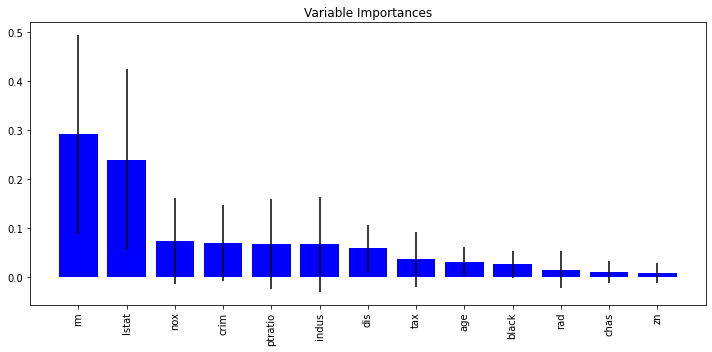

In [11]:
print("OOB RMSE:", round(best_rf.oob_score_ ** 0.5, 2))

importance_df = pd.DataFrame({"feature": X_train.columns, "importance": best_rf.feature_importances_})
print(importance_df.sort_values(by="importance", ascending=False))

import matplotlib.pyplot as plt
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 5))
plt.title("Variable Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

**In a regression task using random forest, it is commonly recommended to select approximately the square root of the total number of predictors (variables) at each node split. Therefore for this case it would be either 3 or 4 depending on model performance.**